In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

STEP #2: IMPORT DATASET

In [3]:
IceCream = pd.read_csv("IceCreamData.csv")

In [4]:
IceCream.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [9]:
# Data size
print(pd.read_csv('IceCreamData.csv').shape)

(500, 2)


In [8]:
# Check for empty cells and count them
print("Number of empty cells:")
print(IceCream.isnull().sum())

Number of empty cells:
Temperature    0
Revenue        0
dtype: int64


In [10]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


 STEP#3: VISUALIZE DATASET

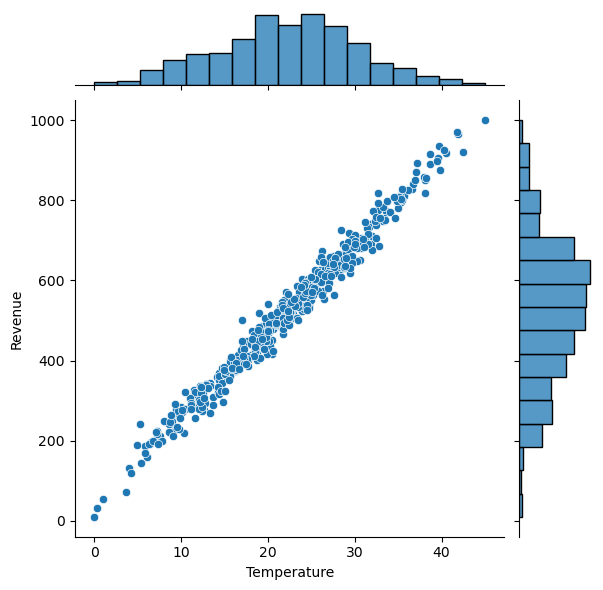

In [12]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

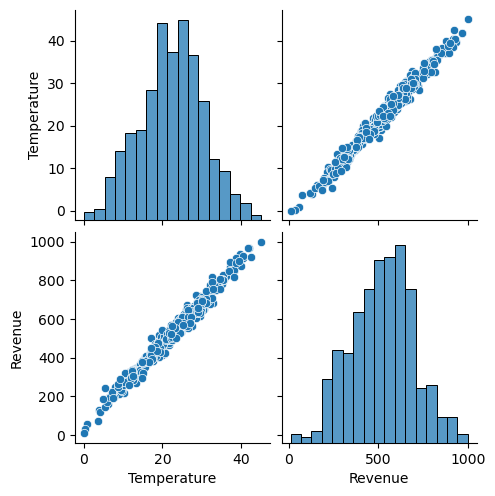

In [13]:
sns.pairplot(IceCream)

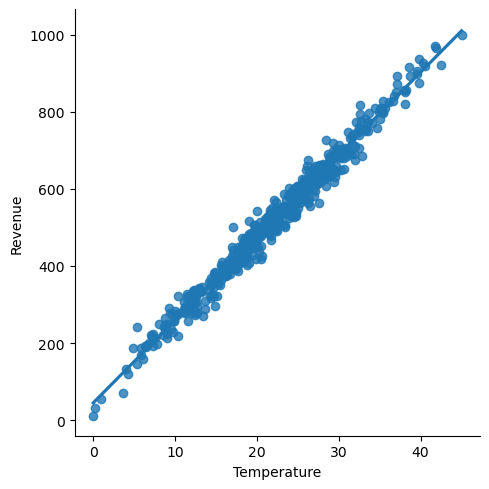

In [14]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

STEP#4: CREATE TESTING AND TRAINING DATASET

In [15]:
y = IceCream['Revenue']
X = IceCream[['Temperature']]

In [16]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

STEP#5: TRAIN THE MODEL

In [18]:
X_train.shape

(375, 1)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.55661986]
Linear Model Coefficient (b):  43.131028896255316


STEP#6: TEST THE MODEL 

In [21]:
y_predict = regressor.predict( X_test)
y_predict

array([ 691.57763684,  475.34526472,  725.81763809,  687.24224576,
        623.95524377,  411.54755709,  571.73915717,  673.68635889,
        321.22577902,  690.43768161,  544.25167311,  647.71670812,
        329.8727963 ,  381.06309152,  447.82492643,  440.63470316,
        804.7524529 ,  184.1655247 ,  631.21855131,  657.31714387,
        802.29568568,  577.27550548,  571.12760255,  864.36514089,
        479.97619188,  196.34451073,  720.28112595,  450.20017924,
        484.50330646,  446.42253552,  571.8901822 ,  450.12768583,
        476.50316907,  436.1777903 ,  352.52271467,  474.61661799,
        674.99894083,  624.38841521,  350.6047515 ,  597.52337165,
       1013.17892269,  590.24746771,  632.1079546 ,  456.90929648,
        641.98469685,  540.14506029,  609.00837893,  671.05656337,
        603.51677764,  473.8941136 ,  198.84262452,  419.40531257,
        189.18157587,  606.2360202 ,  699.67538518,  576.16489679,
        565.67152355,  652.57471337,  572.71001754,  267.39365

In [22]:
y_test

443    698.971806
420    473.499631
9      737.800824
450    683.544781
227    618.172091
          ...    
318    639.538012
180    250.131728
487    793.079011
446    322.888783
251    747.963270
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

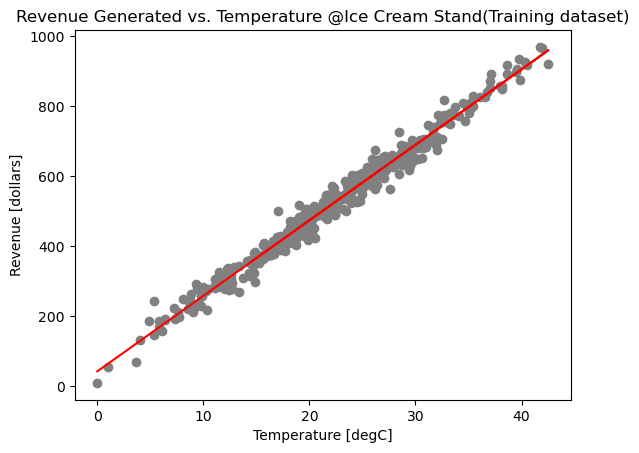

In [23]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

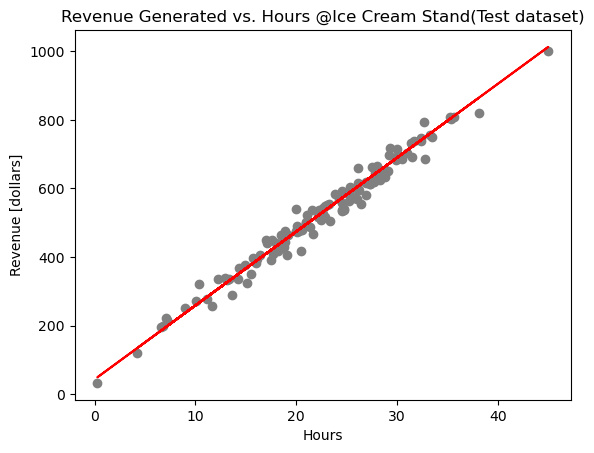

In [24]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

In [33]:
y_predict = regressor.predict([[45]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
print(y_predict)

[1013.17892269]


In [36]:
# Accuracy

score = regressor.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")

Accuracy: 0.98
